In [1]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn.utils import shuffle
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.model_selection import validation_curve, ValidationCurveDisplay
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn import random_projection
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


learning on dataset Iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.504185
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.503452
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset Breast Cancer
training: constant learning-rate
Training set score: 0.984183
Training set loss: 0.064651
training: constant with momentum
Training set score: 0.989455
Training set loss: 0.044569
training: constant with Nesterov's momentum
Training set score: 0.980668
Training set loss: 0.056754
training: inv-s

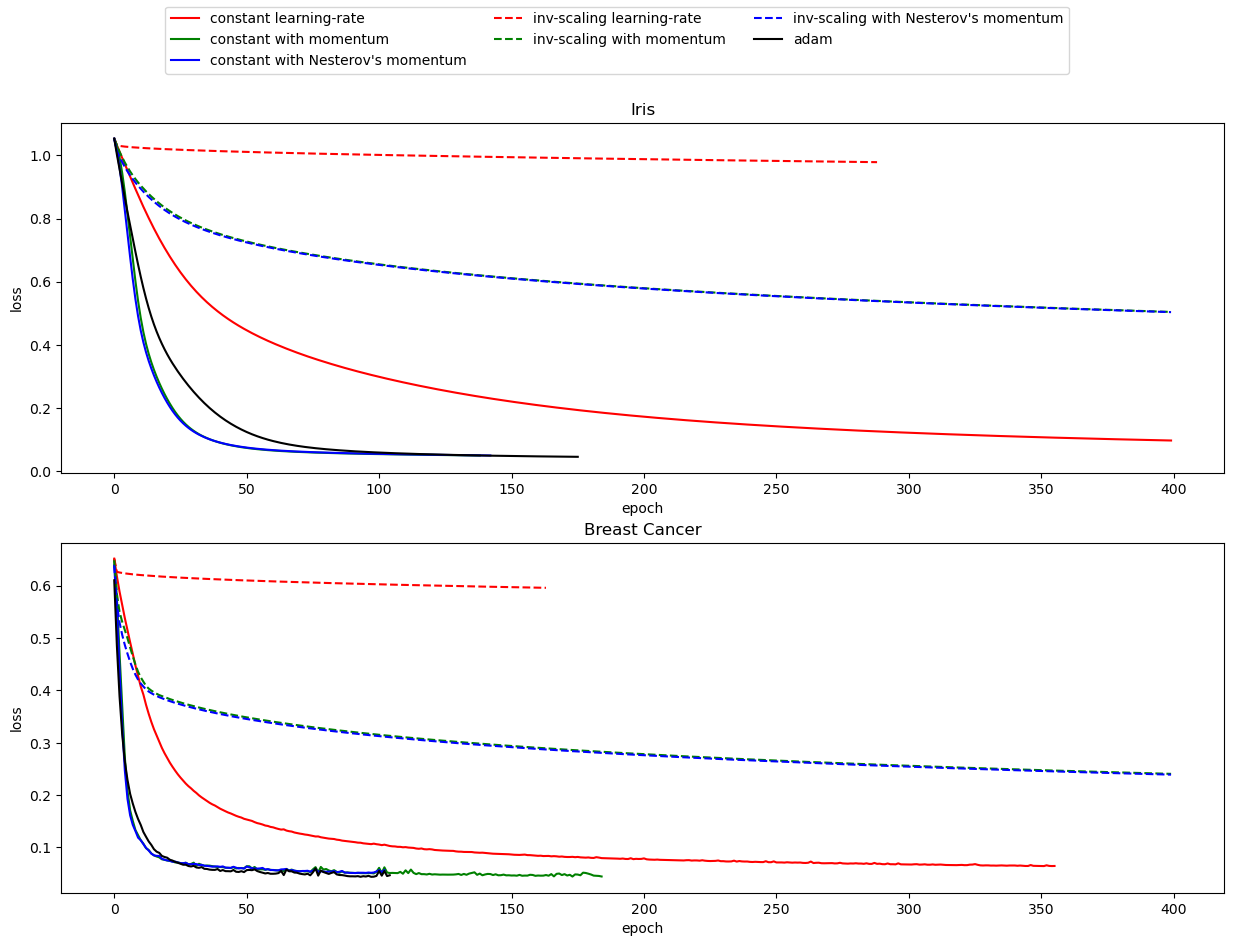

In [36]:
# Plotting loss curves

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, figsize=(15,10))
# load / generate some toy datasets
iris = datasets.load_iris()
bc = datasets.load_breast_cancer()
data_sets = [
    (iris.data, iris.target),
    (bc.data, bc.target),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["Iris", "Breast Cancer"]
):
    ax.set_xlabel("epoch")
    ax.set_ylabel("loss")
    plot_on_dataset(*data, ax=ax, name=name)
    

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

CV train 1.0


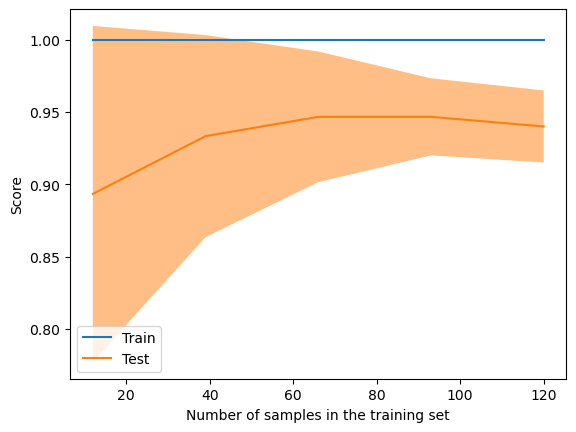

CV mean score with default params is  0.9400000000000001


C:\Users\jmaal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jmaal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jmaal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [ ]:
# Iris with default params

# shuffle dataset
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X,y, random_state=0)
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,200,200,200,200),
    random_state=0, early_stopping = True)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']

print("CV train", train_scores.mean())

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y)
display = LearningCurveDisplay(train_sizes=train_sizes,
                               train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()


# Default params score
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
print("CV mean score with default params is ", scores.mean())


#validation curves

clf = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,200,200,200,200),
    random_state=0, early_stopping = True, max_iter = 500)
ValidationCurveDisplay.from_estimator(
   clf, X, y, param_name="alpha", param_range= np.logspace(-5, 2)
)

clf = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,200,200,200,200),
    random_state=0, early_stopping = True, max_iter = 300)
ValidationCurveDisplay.from_estimator(
   clf, X, y, param_name="learning_rate_init", param_range= np.logspace(-5, -2)
)


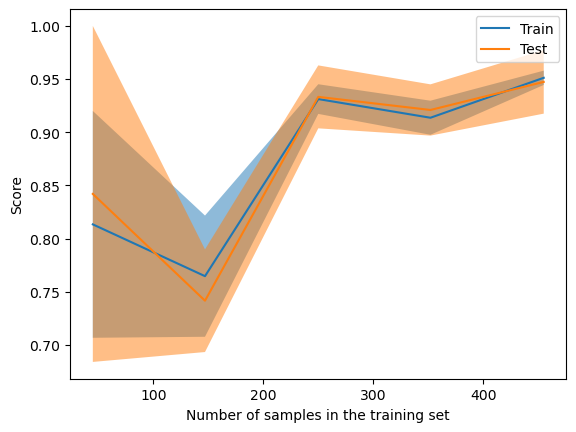

CV mean score with default params is  0.947352895513119


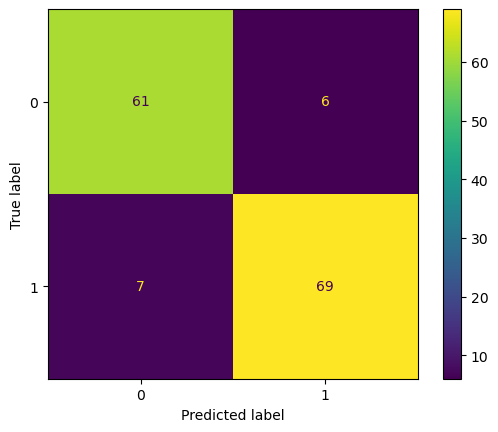

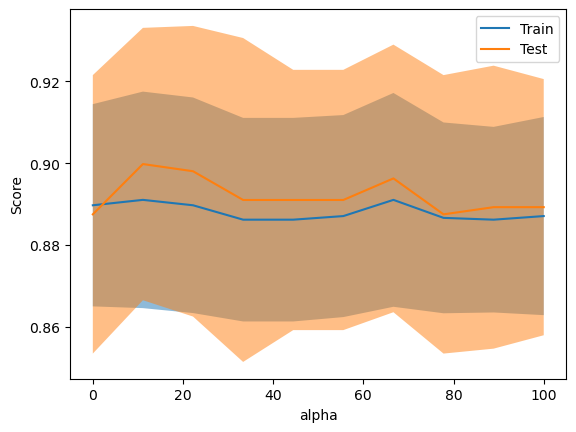

In [29]:
# BC Curves

# shuffle dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X,y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y)

# train learner
# clf = MLPClassifier(random_state=0, early_stopping = True)
clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=0, early_stopping = True))
clf.fit(X,y)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y)
display = LearningCurveDisplay(train_sizes=train_sizes,
                               train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()


# Default params score
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
print("CV mean score with default params is ", scores.mean())

# Confusion Matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
cm_disp.plot()
plt.show()


#validation curve 
clf = MLPClassifier(random_state=0, early_stopping = True)
ValidationCurveDisplay.from_estimator(
   clf, X, y, param_name="alpha", param_range= np.linspace(0.00001, 100, 10)
)

In [43]:
# grid search params
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X)

params = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'], 
    'alpha' : np.linspace(0.00001, 100, 10),
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True]
}

gs = GridSearchCV(estimator= MLPClassifier(), param_grid= params)

X_train, X_test, y_train, y_test = train_test_split(X, y)
p = gs.fit(X_train, y_train)
print("optimal iris params", p.best_params_)

# bc

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X)

params = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'], 
    'alpha' : np.linspace(0.00001, 100, 10),
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True]
}

gs = GridSearchCV(estimator= MLPClassifier(), param_grid= params)

X_train, X_test, y_train, y_test = train_test_split(X, y)
p = gs.fit(X_train, y_train)
print("optimal bc params", p.best_params_)

optimal iris params {'activation': 'tanh', 'alpha': 1e-05, 'early_stopping': True, 'learning_rate': 'constant'}
optimal bc params {'activation': 'identity', 'alpha': 11.11112, 'early_stopping': True, 'learning_rate': 'adaptive'}


In [18]:
# iris optimal params

X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf_iris = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True)

clf_iris.fit(X_train, y_train)
cv_results_iris = cross_validate(clf_iris, X, y)
test_score_iris = cv_results_iris['test_score'].mean()
fit_time_iris = cv_results_iris['fit_time'].mean()

print("CV test score:", test_score_iris)
print("training time:", fit_time_iris)

CV test score: 0.9733333333333333
training time: 0.08310866355895996


In [10]:
# BC optimal params

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf_bc = MLPClassifier(activation = 'tanh', 
        learning_rate = 'adaptive',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True)

cv_results_bc = cross_validate(clf_bc, X, y)
f1_results = cross_validate(clf_bc, X, y, scoring = 'f1')
test_score_bc = cv_results_bc['test_score'].mean()
f1_score = f1_results['test_score'].mean()
fit_time_bc = cv_results_bc['fit_time'].mean()

print("CV test score:", test_score_bc)
print("F1 test score:", f1_score)
print("training time:", fit_time_bc)

CV test score: 0.9754230709517155
F1 test score: 0.9805284120837687
training time: 0.16319808959960938


<Figure size 1000x1000 with 0 Axes>

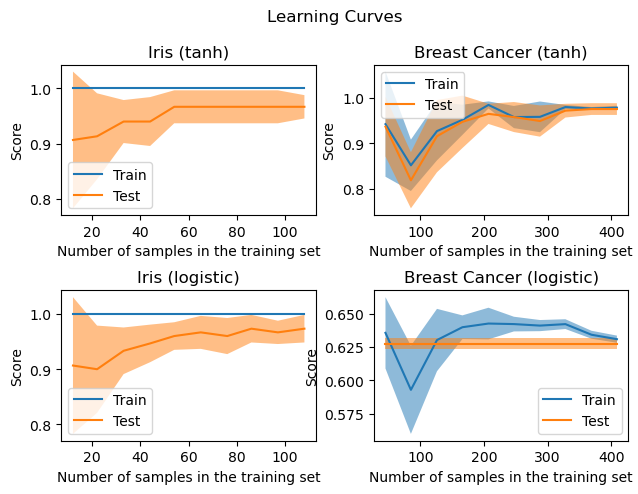

In [25]:
# learning curves

# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)
iris_x = StandardScaler().fit_transform(iris_x) 

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)
bc_x = StandardScaler().fit_transform(bc_x) 

clf_iris = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True)

clf_bc = MLPClassifier(activation = 'tanh', 
        learning_rate = 'adaptive',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True)



# learning curves
plt.figure(figsize=(10,10))
plt.tight_layout()
fig1, axs1 = plt.subplots(2,2)
fig1.suptitle("Learning Curves")
axs1[0,0].set_title("Iris (tanh)")
axs1[0,1].set_title("Breast Cancer (tanh)")
axs1[1,0].set_title("Iris (logistic)")
axs1[1,1].set_title("Breast Cancer (logistic)")

plt.tight_layout()
fig1.subplots_adjust(hspace = .5)

LearningCurveDisplay.from_estimator(MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True)
                                    , iris_x, iris_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[0,0])

LearningCurveDisplay.from_estimator(MLPClassifier(activation = 'tanh', 
        learning_rate = 'constant',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True), 
                                    bc_x, bc_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[0,1])

LearningCurveDisplay.from_estimator(MLPClassifier(activation = 'logistic', 
                        learning_rate = 'adaptive',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True), iris_x, iris_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[1,0])
LearningCurveDisplay.from_estimator( MLPClassifier(activation = 'logistic', 
        learning_rate = 'adaptive',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True), 
                                    bc_x, bc_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[1,1])





In [ ]:
# Validation curves
# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)
iris_x = StandardScaler().fit_transform(iris_x) 

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)
bc_x = StandardScaler().fit_transform(bc_x) 

clf_iris = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True, max_iter = 500)

clf_bc = MLPClassifier(activation = 'tanh', 
        learning_rate = 'adaptive',
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True, max_iter = 500)

fig2, axs2 = plt.subplots(2)
fig2.suptitle("L2 Regularization")
axs2[0].set_title("Iris")
axs2[1].set_title("Breast Cancer")
fig2.tight_layout()
fig2.set_figwidth(2)
fig2.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(
   clf_iris, iris_x, iris_y, param_name="alpha", param_range= np.logspace(-7, 1), ax = axs2[0]
)

ValidationCurveDisplay.from_estimator(
   clf_bc, bc_x, bc_y, param_name="alpha", param_range= np.logspace(-7, 1), ax = axs2[1]
)



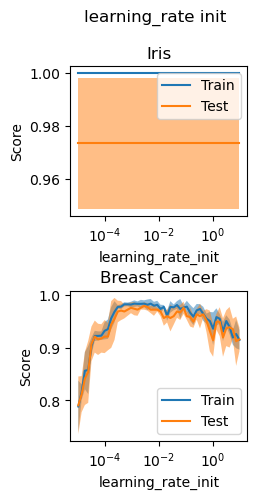

In [31]:
# Validation curves
# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)
iris_x = StandardScaler().fit_transform(iris_x) 

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)
bc_x = StandardScaler().fit_transform(bc_x) 

clf_iris = MLPClassifier(activation = 'tanh', 
                        learning_rate = 'constant',
                        alpha = .001,
                    solver = 'lbfgs',
                    hidden_layer_sizes = (200,),
    random_state=0, early_stopping = True, max_iter = 500)

clf_bc = MLPClassifier(activation = 'tanh', 
        learning_rate = 'adaptive',
        alpha = .01,
        solver ='adam',
        hidden_layer_sizes = (100,100,100),
        random_state=0, early_stopping = True, max_iter = 500)

fig2, axs2 = plt.subplots(2)
fig2.suptitle("learning_rate init")
axs2[0].set_title("Iris")
axs2[1].set_title("Breast Cancer")
fig2.tight_layout()
fig2.set_figwidth(2)
fig2.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(
  clf_iris, iris_x, iris_y, param_name="learning_rate_init", param_range= np.logspace(-5, 1),
    ax = axs2[0]
)

ValidationCurveDisplay.from_estimator(
  clf_bc, bc_x, bc_y, param_name="learning_rate_init", param_range= np.logspace(-5, 1),
    ax= axs2[1]
)


score means: [0.7210526315789474, 0.7842105263157895, 0.5631578947368421, 0.8315789473684211, 0.5789473684210527]
score vars: [0.01013850415512465, 0.006204986149584486, 0.02398891966759003, 0.002659279778393353, 0.018005540166204984]
LC mean: [78.2, 79.4, 74.8, 72.6, 78.6]
fit times: [0.02732529640197754, 0.021737384796142577, 0.03079538345336914, 0.023406410217285158, 0.028140687942504884]
test scores: [0.7466666666666667, 0.7866666666666666, 0.7866666666666667, 0.74, 0.7266666666666667]
training iters:
13
21
22
16
24


Text(0, 0.5, 'training loss')

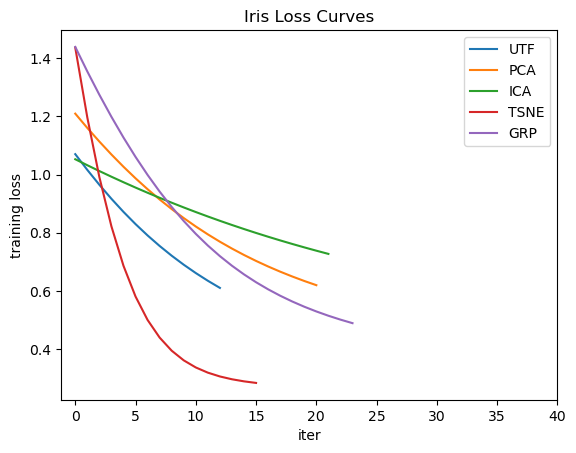

In [7]:
# Iris DimRed

X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 

X_pca = PCA(n_components=2).fit_transform(X)
X_ica = FastICA(n_components=1).fit_transform(X)
X_emb = TSNE(n_components=2, perplexity= 10).fit_transform(X)
X_grp = random_projection.GaussianRandomProjection(n_components = 2, 
                                                random_state=np.random.randint(100)).fit_transform(X)

X_arr = [X, X_pca, X_ica, X_emb, X_grp]


test_scores = []
fit_times = []
loss_curves = []

score_means = []
score_vars = []
lc_means = []
lc_vars = []

# Mean-var runs
for i in range(len(X_arr)):
    scores = []
    lc = []
    for j in range(5):
    
        X_pca = PCA(n_components=2).fit_transform(X)
        X_ica = FastICA(n_components=1).fit_transform(X)
        X_emb = TSNE(n_components=2, perplexity= 10).fit_transform(X)
        X_grp = random_projection.GaussianRandomProjection(n_components = 2, 
                                                    random_state=np.random.randint(100)).fit_transform(X)

        X_arr = [X, X_pca, X_ica, X_emb, X_grp]
    
        X_train, X_test, y_train, y_test = train_test_split(X_arr[i],y)

        clf = MLPClassifier(activation = 'tanh', 
                                learning_rate = 'adaptive',
                                alpha = .001,
                            solver = 'sgd',
                            max_iter = 1000,
                            hidden_layer_sizes = (200,),
                    random_state=np.random.randint(100),
                                 early_stopping = True)

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)
        
        lc.append(len(clf.loss_curve_))
        
    
    score_means.append(np.mean(scores))
    score_vars.append(np.var(scores))
    lc_means.append(np.mean(lc))
    lc_vars.append(np.var(lc))

print("score means:", score_means)
print("score vars:", score_vars)
print("LC mean:", lc_means)
   
# CV

X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 

X_pca = PCA(n_components=2).fit_transform(X)
X_ica = FastICA(n_components=1).fit_transform(X)
X_emb = TSNE(n_components=2, perplexity= 10).fit_transform(X)
X_grp = random_projection.GaussianRandomProjection(n_components = 2, 
                                                random_state=np.random.randint(100)).fit_transform(X)

X_arr = [X, X_pca, X_ica, X_emb, X_grp]

for x in X_arr:
    
    X_train, X_test, y_train, y_test = train_test_split(x,y)

    clf = MLPClassifier(activation = 'tanh', 
                            learning_rate = 'adaptive',
                            alpha = .001,
                        solver = 'adam',
                        max_iter = 1000,
                        hidden_layer_sizes = (200,),
                random_state=np.random.randint(100),
                             early_stopping = True)

    clf.fit(X_train, y_train)
    
    loss_curves.append(clf.loss_curve_)

    cv_results = cross_validate(clf, X, y)
    test_score = cv_results['test_score'].mean()
    fit_time = cv_results['fit_time'].mean()
    
    test_scores.append(test_score)
    fit_times.append(fit_time)

print("fit times:", fit_times)
print("test scores:", test_scores)

print("training iters:")
for i in range(len(loss_curves)):
    print(len(loss_curves[i]))

fig, ax = plt.subplots() 

labels = ["UTF", "PCA", "ICA", "TSNE", "GRP"]

for i in range(len(loss_curves)):
    ax.plot(loss_curves[i],label = labels[i])

ax.legend()
ax.set_xticks([x for x in range(0,45,5)])
ax.set_title("Iris Loss Curves")
ax.set_xlabel("iter")
ax.set_ylabel("training loss")

score means: [0.9678321678321679, 0.944055944055944, 0.9342657342657343, 0.958041958041958]
score vars: [0.0003442711135018829, 0.000195608587216978, 0.000618123135605653, 0.0002542911633820723]
LC mean: [19.2, 16.2, 14.6, 17.6]
fit times: [0.12569284439086914, 0.13759169578552247, 0.11270442008972167, 0.17010931968688964]
test scores: [0.968390001552554, 0.9613879832324173, 0.959633597267505, 0.9754230709517155]
training iters:
16
20
12
21


Text(0, 0.5, 'training loss')

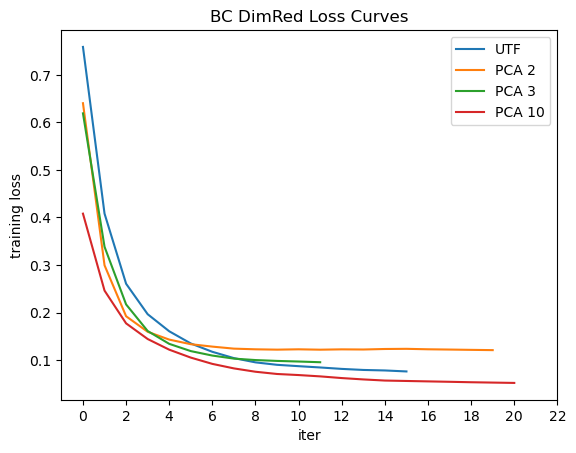

In [6]:
# DimRed Cancer


X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 

X_pca10 = PCA(n_components=10).fit_transform(X)
X_pca3 = PCA(n_components=3).fit_transform(X)
X_pca2 = PCA(n_components=2).fit_transform(X)

X_arr = [X, X_pca2,X_pca3,X_pca10]

test_scores = []
fit_times = []
loss_curves = []

score_means = []
score_vars = []
lc_means = []
lc_vars = []

# Mean-var runs
for i in range(len(X_arr)):
    scores = []
    lc = []
    for j in range(5):
        X_pca2 = PCA(n_components=2).fit_transform(X)
        X_pca3 = PCA(n_components=3).fit_transform(X)
        X_pca10 = PCA(n_components=10).fit_transform(X)

        X_arr = [X, X_pca2, X_pca3, X_pca10]
    
        X_train, X_test, y_train, y_test = train_test_split(X_arr[i],y)

        clf = MLPClassifier(activation = 'tanh', 
            learning_rate = 'adaptive',
            alpha = .001,
            solver ='adam',
            hidden_layer_sizes = (100,100,100),
            random_state=np.random.randint(100),
                        early_stopping = True)

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)
        
        lc.append(len(clf.loss_curve_))
        
    
    score_means.append(np.mean(scores))
    score_vars.append(np.var(scores))
    lc_means.append(np.mean(lc))
    lc_vars.append(np.var(lc))

print("score means:", score_means)
print("score vars:", score_vars)
print("LC mean:", lc_means)
   
# CV

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 

X_pca2 = PCA(n_components=2).fit_transform(X)
X_pca3 = PCA(n_components=3).fit_transform(X)
X_pca10 = PCA(n_components=10).fit_transform(X)

X_arr = [X, X_pca2, X_pca3, X_pca10]

for x in X_arr:
    
    X_train, X_test, y_train, y_test = train_test_split(x,y)

    clf = MLPClassifier(activation = 'tanh', 
            learning_rate = 'adaptive',
            alpha = .001,
            solver ='adam',
            hidden_layer_sizes = (100,100,100),
            random_state=np.random.randint(100),
                        early_stopping = True)

    clf.fit(X_train, y_train)
    
    loss_curves.append(clf.loss_curve_)

    cv_results = cross_validate(clf, X, y)
    test_score = cv_results['test_score'].mean()
    fit_time = cv_results['fit_time'].mean()
    
    test_scores.append(test_score)
    fit_times.append(fit_time)

print("fit times:", fit_times)
print("test scores:", test_scores)

print("training iters:")
for i in range(len(loss_curves)):
    print(len(loss_curves[i]))

fig, ax = plt.subplots() 

labels = ["UTF", "PCA 2", "PCA 3", "PCA 10"]

for i in range(len(loss_curves)):
    ax.plot(loss_curves[i],label = labels[i])

ax.legend()
ax.set_title("BC DimRed Loss Curves")
ax.set_xticks([x for x in range(0,23,2)])
ax.set_xlabel("iter")
ax.set_ylabel("training loss")

Text(0, 0.5, 'training loss')

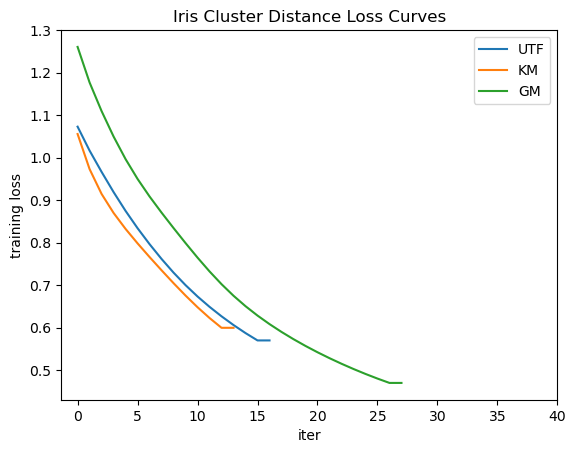

In [34]:
fig, ax = plt.subplots() 

labels = ["UTF", "KM", "GM"]

for i in range(len(loss_curves)):
    loss_curves[i].append(loss_curves[i][-1])
    ax.plot(loss_curves[i],label = labels[i])

ax.legend()
ax.set_xticks([x for x in range(0,45,5)])
ax.set_title("Iris Cluster Distance Loss Curves")
ax.set_xlabel("iter")
ax.set_ylabel("training loss")

fit times: [0.09219794273376465, 0.06232500076293945, 0.059410810470581055]
training scores: [0.9718796992481202, 0.946398689030268, 0.955641989589358]
test scores: [0.9630957925787922, 0.9367023754075452, 0.9525384257102933]
training iters:
21
16
26


Text(0, 0.5, 'training loss')

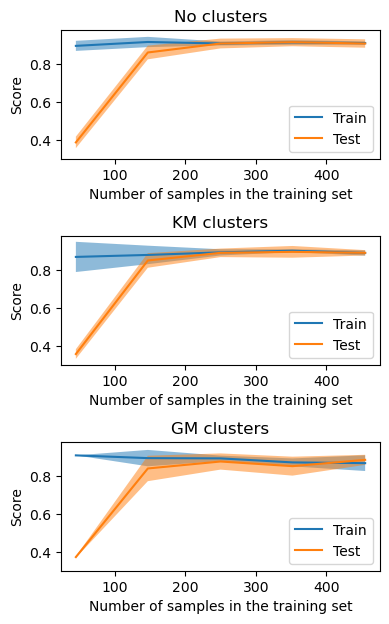

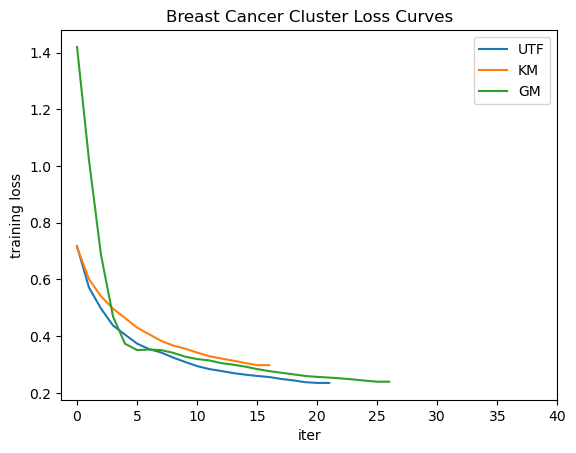

In [25]:
# Cluster BC

bc = datasets.load_breast_cancer(as_frame=True)
X = bc.data
X= StandardScaler().fit_transform(X)
y = bc.target

km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X)
gm = GaussianMixture(n_components=2,
                         covariance_type='full',
                         random_state=np.random.randint(100)).fit(X)

km_cluster = km.predict(X)
gm_cluster = gm.predict(X)

df_km = bc.data
df_gm = bc.data

df_km["cluster"] = km_cluster
df_gm["cluster"] = gm_cluster


X_arr = [bc.data.values, df_km.values, df_gm.values]



test_scores = []
fit_times = []
loss_curves = []
training_scores = []

score_means = []
score_vars = []
lc_means = []
lc_vars = []
   
# CV

fig, ax = plt.subplots(3,1,sharey=True, figsize=(4,6))
fig.tight_layout()
plt.subplots_adjust(hspace = .6)

titles = ["No clusters", "KM clusters", "GM clusters"]

for i in range(len(X_arr)):
    
    X_train, X_test, y_train, y_test = train_test_split(X_arr[i],y)

    clf = MLPClassifier(activation = 'tanh', 
                            learning_rate = 'adaptive',
                            alpha = .001,
                        solver = 'adam',
                        max_iter = 1000,
                        hidden_layer_sizes = (200,),
                random_state=np.random.randint(100),
                             early_stopping = True)

    clf.fit(X_train, y_train)
    
       # Learning Curve
    LearningCurveDisplay.from_estimator(clf, X_arr[i], y, 
                                  ax=ax[i])
    ax[i].set_title(titles[i])
    
    loss_curves.append(clf.loss_curve_)

    cv_results = cross_validate(clf, X, y,return_train_score=True)
    test_score = cv_results['test_score'].mean()
    training_score = cv_results['train_score'].mean()
    fit_time = cv_results['fit_time'].mean()
    
    test_scores.append(test_score)
    training_scores.append(training_score)
    fit_times.append(fit_time)

print("fit times:", fit_times)
print("training scores:", training_scores)
print("test scores:", test_scores)


print("training iters:")
for i in range(len(loss_curves)):
    print(len(loss_curves[i]))

fig, ax = plt.subplots() 

labels = ["UTF", "KM", "GM"]

for i in range(len(loss_curves)):
    loss_curves[i].append(loss_curves[i][-1])
    ax.plot(loss_curves[i],label = labels[i])

ax.legend()
ax.set_xticks([x for x in range(0,45,5)])
ax.set_title("Breast Cancer Cluster Loss Curves")
ax.set_xlabel("iter")
ax.set_ylabel("training loss")

Text(0, 0.5, 'training loss')

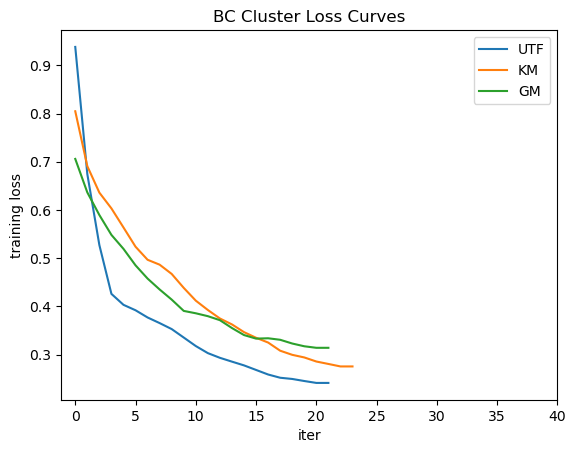

fit times: [0.06967501640319824, 0.07947521209716797, 0.06368565559387207]
training scores: [0.9595835743204164, 0.9582494698284172, 0.9547329863119337, 0.9516695585116637, 0.9714353190668981, 0.9586967418546367, 0.965287256603046, 0.9639705031810294, 0.9472903412377096]
test scores: [0.9666356155876417, 0.9648657040832168, 0.9454122030740567]
training iters:
17
17
39
27
21
19
15
21
12


IndexError: list index out of range

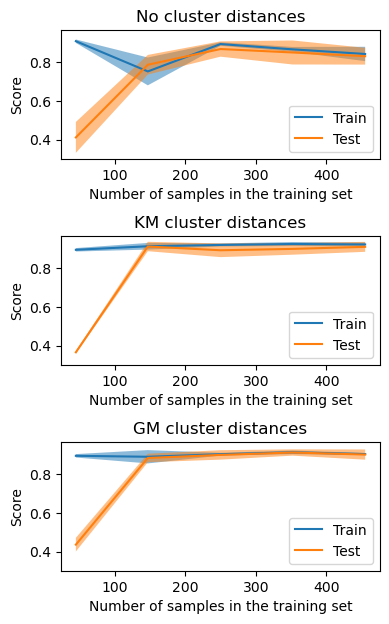

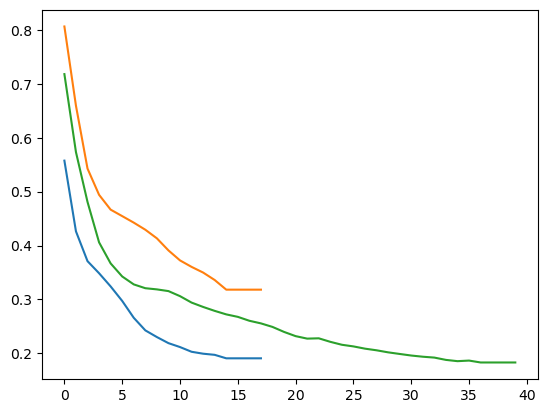

In [24]:
# Cluster distances BC

bc = datasets.load_breast_cancer(as_frame=True)
X = bc.data
X= StandardScaler().fit_transform(X)
y = bc.target

km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X)
gm = GaussianMixture(n_components=2,
                         covariance_type='full',
                         random_state=np.random.randint(100)).fit(X)

km_centers = km.cluster_centers_
gm_centers = gm.means_


df_km = bc.data
df_gm = bc.data

df_km["distance1"] = [np.linalg.norm(X[i] - km_centers[0]) for i in range(len(X))]
df_km["distance2"] = [np.linalg.norm(X[i] - km_centers[1]) for i in range(len(X))]

df_km["distance1"] = [np.linalg.norm(X[i] - gm_centers[0]) for i in range(len(X))]
df_km["distance2"] = [np.linalg.norm(X[i] - gm_centers[1]) for i in range(len(X))]


X_arr = [bc.data.values, df_km.values, df_gm.values]


test_scores = []
fit_times = []
iters = []



# CV

fig, ax = plt.subplots(3,1,sharey=True, figsize=(4,6))
fig.tight_layout()
plt.subplots_adjust(hspace = .6)

titles = ["No cluster distances", "KM cluster distances", "GM cluster distances"]

for i in range(len(X_arr)):
    
    X_train, X_test, y_train, y_test = train_test_split(X_arr[i],y)

    clf = MLPClassifier(activation = 'tanh', 
                            learning_rate = 'adaptive',
                            alpha = .001,
                        solver = 'adam',
                        max_iter = 1000,
                        hidden_layer_sizes = (200,),
                random_state=np.random.randint(100),
                             early_stopping = True)

    clf.fit(X_train, y_train)
    
       # Learning Curve
    LearningCurveDisplay.from_estimator(clf, X_arr[i], y, 
                                  ax=ax[i])
    ax[i].set_title(titles[i])
    
    loss_curves.append(clf.loss_curve_)

    cv_results = cross_validate(clf, X, y,return_train_score=True)
    test_score = cv_results['test_score'].mean()
    training_score = cv_results['train_score'].mean()
    fit_time = cv_results['fit_time'].mean()
    
    test_scores.append(test_score)
    training_scores.append(training_score)
    fit_times.append(fit_time)

print("fit times:", fit_times)
print("training scores:", training_scores)
print("test scores:", test_scores)


print("training iters:")
for i in range(len(loss_curves)):
    print(len(loss_curves[i]))

# Loss Curve
fig, ax = plt.subplots() 

labels = ["UTF", "KM", "GM"]

for i in range(len(loss_curves)):
    loss_curves[i].append(loss_curves[i][-1])
    ax.plot(loss_curves[i],label = labels[i])

ax.legend()
ax.set_xticks([x for x in range(0,30,5)])
ax.set_title("BC Cluster Distance Loss Curves")
ax.set_xlabel("iter")
ax.set_ylabel("training loss")

***Mean var runs***
test [[0.916083916083916, 0.9230769230769231, 0.8951048951048951, 0.8321678321678322, 0.9230769230769231], [0.9300699300699301, 0.8741258741258742, 0.8811188811188811, 0.8811188811188811, 0.8741258741258742], [0.8951048951048951, 0.8671328671328671, 0.9020979020979021, 0.9020979020979021, 0.8881118881118881]]
fit [[0.10979485511779785, 0.09375405311584473, 0.06258773803710938, 0.09375667572021484, 0.0625009536743164], [0.09441089630126953, 0.09374880790710449, 0.10546612739562988, 0.04687643051147461, 0.0781712532043457], [0.045839786529541016, 0.04694533348083496, 0.06256604194641113, 0.0467987060546875, 0.06257414817810059]]
iters [[21, 19, 15, 15, 12], [21, 26, 27, 17, 22], [19, 18, 25, 16, 21]]


<BarContainer object of 3 artists>

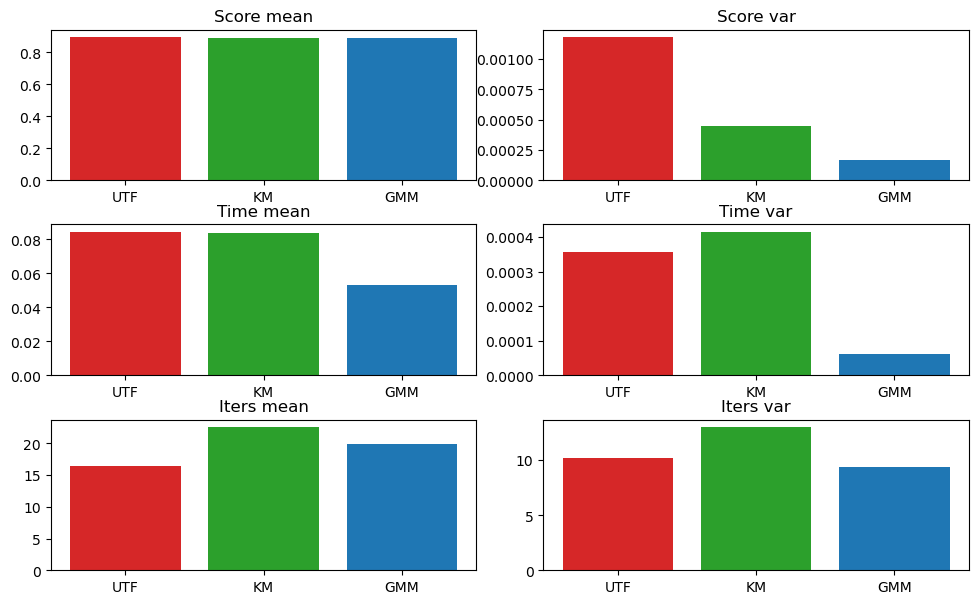

In [23]:
# Cluster distances BC

bc = datasets.load_breast_cancer(as_frame=True)
X = bc.data
X= StandardScaler().fit_transform(X)
y = bc.target

km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X)
gm = GaussianMixture(n_components=2,
                         covariance_type='full',
                         random_state=np.random.randint(100)).fit(X)

km_centers = km.cluster_centers_
gm_centers = gm.means_


df_km = bc.data
df_gm = bc.data

df_km["distance1"] = [np.linalg.norm(X[i] - km_centers[0]) for i in range(len(X))]
df_km["distance2"] = [np.linalg.norm(X[i] - km_centers[1]) for i in range(len(X))]

df_km["distance1"] = [np.linalg.norm(X[i] - gm_centers[0]) for i in range(len(X))]
df_km["distance2"] = [np.linalg.norm(X[i] - gm_centers[1]) for i in range(len(X))]


X_arr = [bc.data.values, df_km.values, df_gm.values]


test_scores = []
fit_times = []
iters = []


for x in X_arr:
    scores = []
    times = []
    its = [] 
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(x,y)

        clf = MLPClassifier(activation = 'tanh', 
                            learning_rate = 'adaptive',
                            alpha = .001,
                        solver = 'adam',
                        max_iter = 1000,
                        hidden_layer_sizes = (200,),
                random_state=np.random.randint(100),
                             early_stopping = True)
        
        start = time()
        clf.fit(X_train, y_train)
        stop = time()
        score = clf.score(X_test, y_test)
        scores.append(score)
        times.append(stop -start)
        its.append(len(clf.loss_curve_))
        
    test_scores.append(scores)
    fit_times.append(times)
    iters.append(its)

print("***Mean var runs***")
print("test", test_scores)
print("fit", fit_times)
print("iters", iters)

fig, axs = plt.subplots(3, 2,figsize=(10,6))
fig.tight_layout()
x = ["UTF", "KM", "GMM"]
colors = ["tab:red", "tab:green", "tab:blue"]

axs[0,0].set_title("Score mean")
axs[0,0].bar(x, [np.mean(x) for x in test_scores], color= colors)

axs[0,1].set_title("Score var")
axs[0,1].bar(x, [np.var(x) for x in test_scores], color= colors)

axs[1,0].set_title("Time mean")
axs[1,0].bar(x, [np.mean(x) for x in fit_times], color= colors)

axs[1,1].set_title("Time var")
axs[1,1].bar(x, [np.var(x) for x in fit_times], color= colors)

axs[2,0].set_title("Iters mean")
axs[2,0].bar(x, [np.mean(x) for x in iters], color= colors)

axs[2,1].set_title("Iters var")
axs[2,1].bar(x, [np.var(x) for x in iters], color= colors)


***Mean var runs***
test [[0.951048951048951, 0.965034965034965, 0.9440559440559441, 0.9370629370629371, 0.965034965034965], [0.8811188811188811, 0.951048951048951, 0.9370629370629371, 0.9230769230769231, 0.958041958041958], [0.916083916083916, 0.9090909090909091, 0.9300699300699301, 0.9230769230769231, 0.958041958041958], [0.958041958041958, 0.951048951048951, 0.965034965034965, 0.958041958041958, 0.958041958041958], [0.7972027972027972, 0.9440559440559441, 0.8951048951048951, 0.951048951048951, 0.965034965034965], [0.8741258741258742, 0.965034965034965, 0.9020979020979021, 0.951048951048951, 0.951048951048951]]
fit [[0.12559247016906738, 0.1405947208404541, 0.14076805114746094, 0.09364962577819824, 0.07147789001464844], [0.03832864761352539, 0.04688596725463867, 0.0780787467956543, 0.031279802322387695, 0.04694676399230957], [0.04677557945251465, 0.07816457748413086, 0.09377121925354004, 0.04685854911804199, 0.1251823902130127], [0.10941958427429199, 0.15673041343688965, 0.0780861377

<BarContainer object of 6 artists>

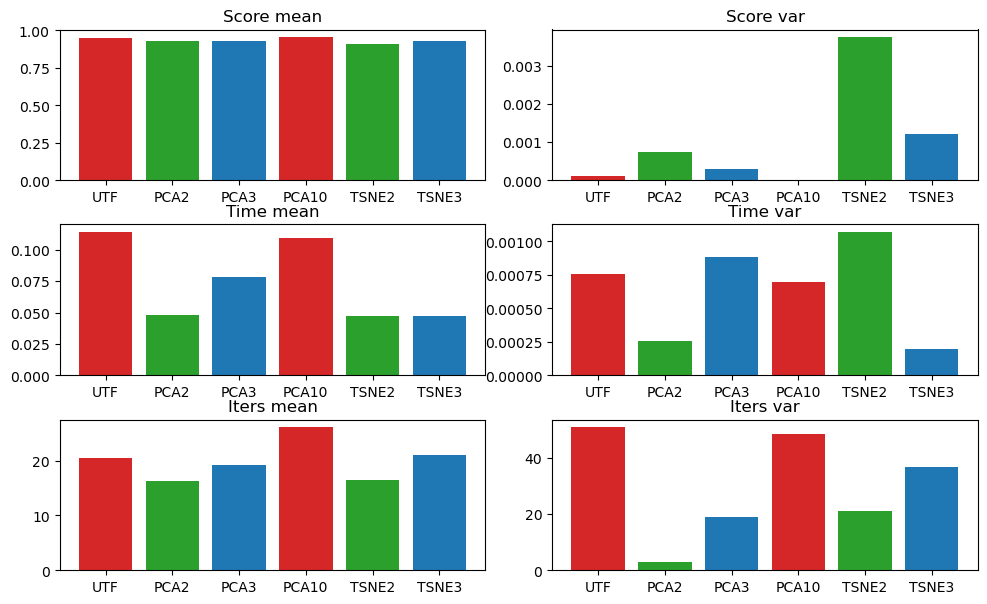

In [45]:
# PCA BC

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 

X_pca10 = PCA(n_components=10).fit_transform(X)
X_pca3 = PCA(n_components=3).fit_transform(X)
X_pca2 = PCA(n_components=2).fit_transform(X)
X_tsne3 = TSNE(n_components=3, perplexity= 100).fit_transform(X)
X_tsne2 = TSNE(n_components=2, perplexity= 100).fit_transform(X)

X_arr = [X, X_pca2,X_pca3,X_pca10, X_tsne2, X_tsne3]

test_scores = []
fit_times = []
iters = []


for x in X_arr:
    scores = []
    times = []
    its = [] 
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(x,y)

        clf = MLPClassifier(activation = 'tanh', 
                            learning_rate = 'adaptive',
                            alpha = .001,
                        solver = 'adam',
                        max_iter = 1000,
                        hidden_layer_sizes = (200,),
                random_state=np.random.randint(100),
                             early_stopping = True)
        
        start = time()
        clf.fit(X_train, y_train)
        stop = time()
        score = clf.score(X_test, y_test)
        scores.append(score)
        times.append(stop -start)
        its.append(len(clf.loss_curve_))
        
    test_scores.append(scores)
    fit_times.append(times)
    iters.append(its)

print("***Mean var runs***")
print("test", test_scores)
print("fit", fit_times)
print("iters", iters)

fig, axs = plt.subplots(3, 2,figsize=(10,6))
fig.tight_layout()
x = ["UTF", "PCA2", "PCA3", "PCA10", "TSNE2", "TSNE3"]
colors = ["tab:red", "tab:green", "tab:blue"]

axs[0,0].set_title("Score mean")
axs[0,0].bar(x, [np.mean(x) for x in test_scores], color= colors)

axs[0,1].set_title("Score var")
axs[0,1].bar(x, [np.var(x) for x in test_scores], color= colors)

axs[1,0].set_title("Time mean")
axs[1,0].bar(x, [np.mean(x) for x in fit_times], color= colors)

axs[1,1].set_title("Time var")
axs[1,1].bar(x, [np.var(x) for x in fit_times], color= colors)

axs[2,0].set_title("Iters mean")
axs[2,0].bar(x, [np.mean(x) for x in iters], color= colors)

axs[2,1].set_title("Iters var")
axs[2,1].bar(x, [np.var(x) for x in iters], color= colors)

Text(0, 0.5, 'training loss')

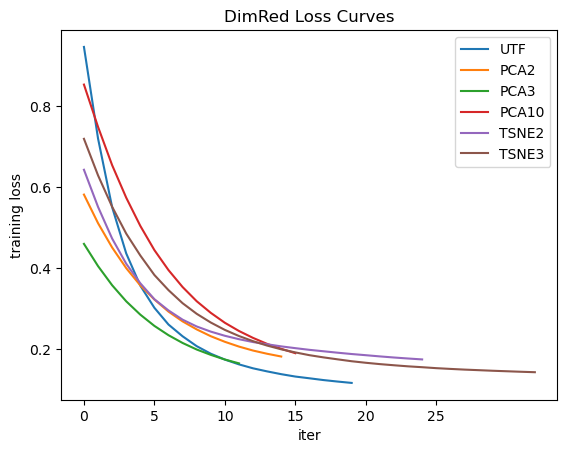

In [48]:
# PCA BC

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
X = StandardScaler().fit_transform(X) 

X_pca10 = PCA(n_components=10).fit_transform(X)
X_pca3 = PCA(n_components=3).fit_transform(X)
X_pca2 = PCA(n_components=2).fit_transform(X)
X_tsne3 = TSNE(n_components=3, perplexity= 100).fit_transform(X)
X_tsne2 = TSNE(n_components=2, perplexity= 100).fit_transform(X)

X_arr = [X, X_pca2,X_pca3,X_pca10, X_tsne2, X_tsne3]

lc = []

for x in X_arr:
    scores = []
    times = []
    its = [] 
    for i in range(1):
        X_train, X_test, y_train, y_test = train_test_split(x,y)

        clf = MLPClassifier(activation = 'tanh', 
                            learning_rate = 'adaptive',
                            alpha = .001,
                        solver = 'adam',
                        max_iter = 1000,
                        hidden_layer_sizes = (200,),
                random_state=np.random.randint(100),
                             early_stopping = True)
        

        clf.fit(X_train, y_train)
        lc.append(clf.loss_curve_)
        


# Loss Curve
fig, ax = plt.subplots() 

labels = ["UTF", "PCA2", "PCA3", "PCA10", "TSNE2", "TSNE3"]

for i in range(len(lc)):
    ax.plot(lc[i],label = labels[i])

ax.legend()
ax.set_xticks([x for x in range(0,30,5)])
ax.set_title("DimRed Loss Curves")
ax.set_xlabel("iter")
ax.set_ylabel("training loss")